In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [4]:
input_path = 'p2p-Gnutella04.txt'
output_path = 'p2p-Gnutella04.csv'

df = pd.read_csv(input_path, sep='\t', comment='#', header=None, names=["FromNodeId", "ToNodeId"])

df.to_csv(output_path, index=False)

print("sucessfully converted.")

sucessfully converted.


## Network Dataset Analysis

This code snippet analyzes a P2P network dataset (`p2p-Gnutella04.txt`):

### Key Metrics:
- **Edges**: Counts directed connections (e.g., `A→B`)  
- **Nodes**: Identifies unique entities in the network  
- **Weights**: Checks if connections have numeric intensities  


In [5]:
file_path = "p2p-Gnutella04.txt"

df = pd.read_csv(file_path, sep="\t", comment='#', header=None, names=["FromNodeId", "ToNodeId"])
print("Dataset Overview:")
print("--------------------------------")
print(f"Total number of edges: {len(df)}")

unique_nodes = pd.unique(df[["FromNodeId", "ToNodeId"]].values.ravel())
print(f"Total number of nodes: {len(unique_nodes)}")

has_weights = df.shape[1] > 2
print(f"Does the dataset include edge weights?: {'Yes' if has_weights else 'No'}")




Dataset Overview:
--------------------------------
Total number of edges: 39994
Total number of nodes: 10876
Does the dataset include edge weights?: No


## Graph Structure Analysis

This code analyzes the topological properties of the constructed directed graph:

### Key Metrics:
- **Directed**: Checks if edges are one-way  
- **Density**: Ratio of actual edges to possible edges (sparsity measure)  
- **Weakly Connected Components**: Subgraphs connected when ignoring edge direction  
- **Isolated Nodes**: Nodes with no connections  

In [6]:
G = nx.DiGraph()
G.add_edges_from(df.values)

print("\n Graph Analysis:")
print("--------------------------------")
print(f"Is the graph directed?: {'Yes' if G.is_directed() else 'No'}")
print(f"Graph density: {nx.density(G):.6f}")
print(f"Number of weakly connected components: {nx.number_weakly_connected_components(G)}")
isolated_nodes = list(nx.isolates(G))
print(f"Number of isolated nodes: {len(isolated_nodes)}")




 Graph Analysis:
--------------------------------
Is the graph directed?: Yes
Graph density: 0.000338
Number of weakly connected components: 1
Number of isolated nodes: 0


This code examines node connectivity patterns in the directed graph:

### Key Metrics:
- **In-degree**: Number of incoming edges (popularity measure)
- **Out-degree**: Number of outgoing edges (activity measure) 
- **Total degree**: Sum of in/out edges (overall connectivity)

In [7]:
# Degree analysis
print("\nDegree Analysis:")
print("--------------------------------")
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
total_degrees = dict(G.degree())

avg_in = sum(in_degrees.values()) / len(in_degrees)
avg_out = sum(out_degrees.values()) / len(out_degrees)
avg_total = sum(total_degrees.values()) / len(total_degrees)

print(f"Average in-degree: {avg_in:.2f}")
print(f"Maximum in degree: {max(in_degrees.values())}")
print(f"Minimum in degree: {min(in_degrees.values())}")
print("---------------")
print(f"Average out-degree: {avg_out:.2f}")
print(f"Maximum out degree: {max(out_degrees.values())}")
print(f"Minimum out degree: {min(out_degrees.values())}")
print("---------------")
print(f"Average total degree: {avg_total:.2f}")
print(f"Maximum total degree: {max(total_degrees.values())}")
print(f"Minimum total degree: {min(total_degrees.values())}")

top_degrees = sorted(total_degrees.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nTop 3 nodes by total degree:")
for node, deg in top_degrees:
    print(f"Node {node}: {deg} degree(s)")


Degree Analysis:
--------------------------------
Average in-degree: 3.68
Maximum in degree: 72
Minimum in degree: 0
---------------
Average out-degree: 3.68
Maximum out degree: 100
Minimum out degree: 0
---------------
Average total degree: 7.35
Maximum total degree: 103
Minimum total degree: 1

Top 3 nodes by total degree:
Node 3109: 103 degree(s)
Node 1054: 82 degree(s)
Node 9134: 66 degree(s)



Top 10 most frequent total degrees:
-----------------------------------
Degree 1: 2467 nodes
Degree 2: 1439 nodes
Degree 11: 919 nodes
Degree 3: 804 nodes
Degree 12: 696 nodes
Degree 4: 564 nodes
Degree 13: 536 nodes
Degree 14: 426 nodes
Degree 5: 413 nodes
Degree 6: 355 nodes


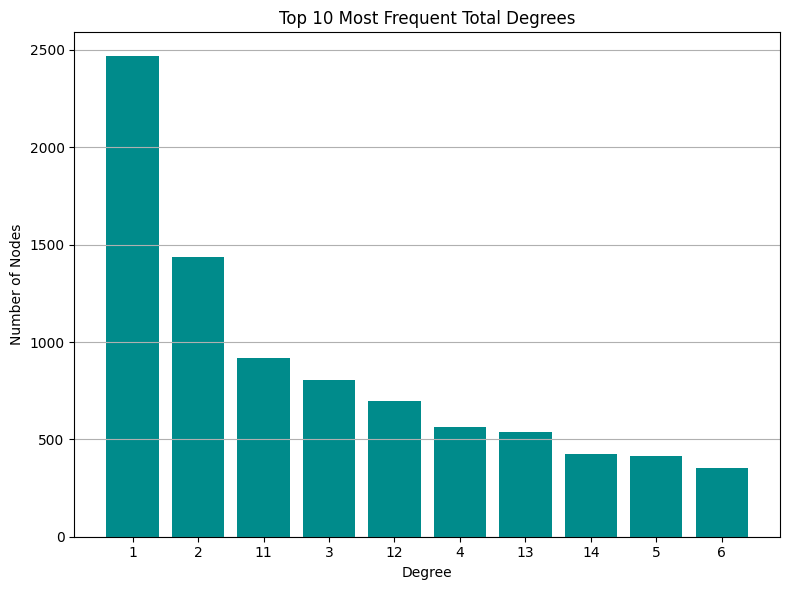

In [38]:
from collections import Counter

# Count frequency of each total degree
degree_values = list(total_degrees.values())
degree_freq = Counter(degree_values)

top_10_degrees = degree_freq.most_common(10)
print("\nTop 10 most frequent total degrees:")
print("-----------------------------------")
for degree, count in top_10_degrees:
    print(f"Degree {degree}: {count} nodes")

# Bar chart
degrees, counts = zip(*top_10_degrees)
plt.figure(figsize=(8, 6))
plt.bar([str(d) for d in degrees], counts, color='darkcyan')
plt.title("Top 10 Most Frequent Total Degrees")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


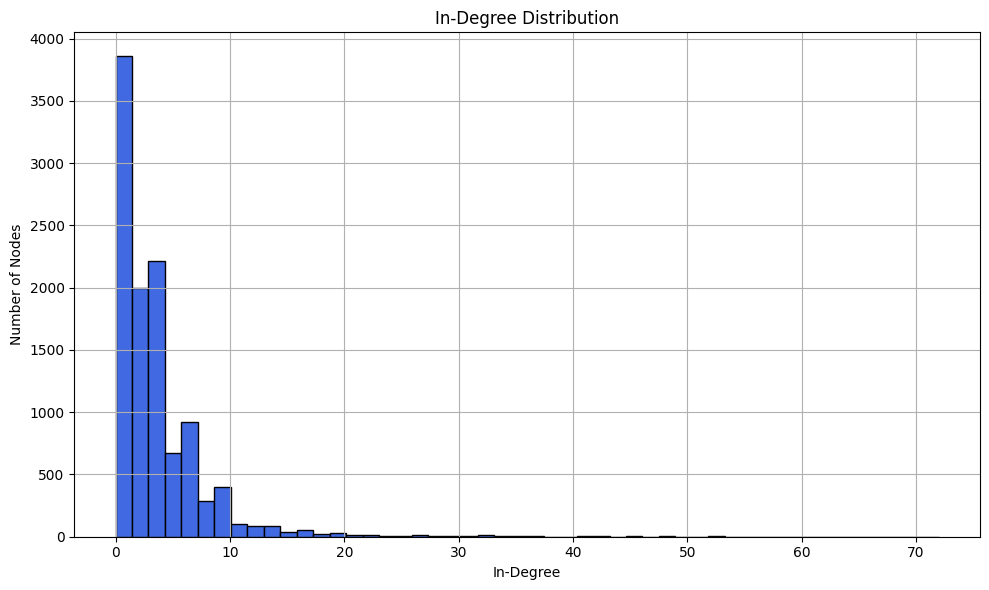

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(in_degrees.values(), bins=50, color='royalblue', edgecolor='black')
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.tight_layout()
plt.show()

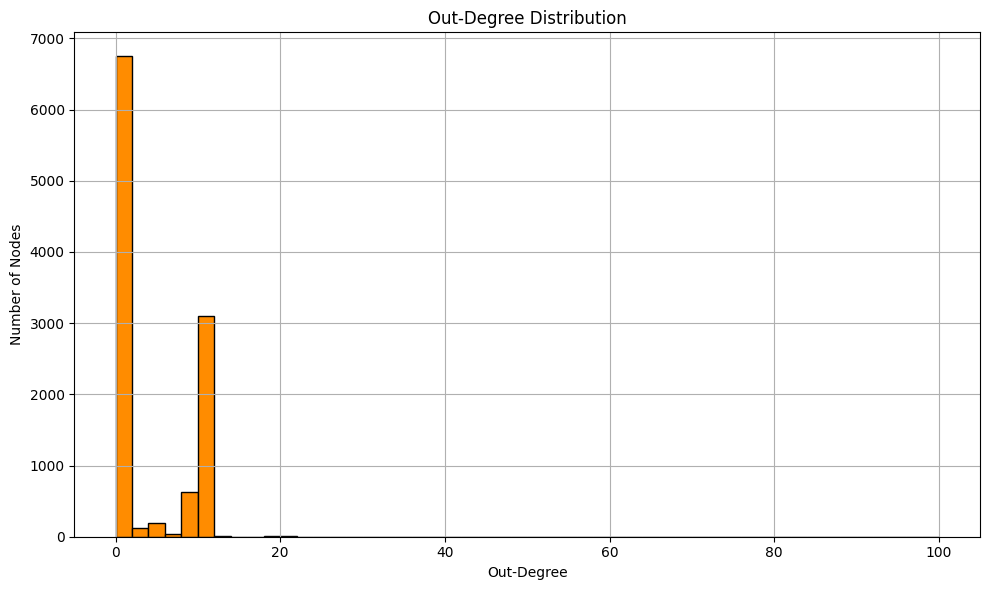

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(out_degrees.values(), bins=50, color='darkorange', edgecolor='black')
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 Centrality Measures in Network Graph

This section analyzes the centrality of nodes in the graph `G` using three commonly used metrics:

### 🔹 1. PageRank Centrality
- **Definition:** PageRank is used to rank nodes based on their importance, taking into account both the number and quality of links to a node.
- **Code Steps:**
  - `nx.pagerank(G)`: Calculates PageRank for all nodes in the graph.
  - `avg_pagerank`: Computes the average PageRank value.
  - The top 3 nodes are extracted based on their PageRank scores and printed.

### 🔹 2. Betweenness Centrality
- **Definition:** Betweenness measures how often a node appears on the shortest paths between pairs of nodes. High betweenness suggests a node is a bridge or bottleneck.
- **Code Steps:**
  - `nx.betweenness_centrality(G)`: Calculates betweenness centrality for each node.
  - `avg_betweenness`: Average of all betweenness values.
  - Displays the top 3 nodes with highest betweenness values.

### 🔹 3. Closeness Centrality
- **Definition:** Closeness indicates how close a node is to all other nodes in the network. A higher score means shorter distances on average.
- **Code Steps:**
  - `nx.closeness_centrality(G)`: Computes closeness centrality.
  - `avg_closeness`: Mean of all closeness values.
  - Prints the top 3 nodes by closeness.

In [8]:
print("\nCentrality Measures:")
print("--------------------------------")

# PageRank
pagerank = nx.pagerank(G)
avg_pagerank = sum(pagerank.values()) / len(pagerank)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"Average PageRank: {avg_pagerank:.5f}")
print("Top 3 nodes by PageRank:")
for node, score in top_pagerank:
    print(f"Node {node}: PageRank = {score:.5f}")

# Betweenness
betweenness = nx.betweenness_centrality(G)
avg_betweenness = sum(betweenness.values()) / len(betweenness)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"\nAverage Betweenness Centrality: {avg_betweenness:.5f}")
print("Top 3 nodes by Betweenness Centrality:")
for node, score in top_betweenness:
    print(f"Node {node}: Betweenness = {score:.5f}")

# Closeness
closeness = nx.closeness_centrality(G)
avg_closeness = sum(closeness.values()) / len(closeness)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"\nAverage Closeness Centrality: {avg_closeness:.5f}")
print("Top 3 nodes by Closeness Centrality:")
for node, score in top_closeness:
    print(f"Node {node}: Closeness = {score:.5f}")


Centrality Measures:
--------------------------------
Average PageRank: 0.00009
Top 3 nodes by PageRank:
Node 1056: PageRank = 0.00067
Node 1054: PageRank = 0.00066
Node 1536: PageRank = 0.00055

Average Betweenness Centrality: 0.00021
Top 3 nodes by Betweenness Centrality:
Node 3109: Betweenness = 0.00595
Node 410: Betweenness = 0.00591
Node 696: Betweenness = 0.00583

Average Closeness Centrality: 0.06170
Top 3 nodes by Closeness Centrality:
Node 1056: Closeness = 0.10380
Node 1054: Closeness = 0.10199
Node 453: Closeness = 0.10037


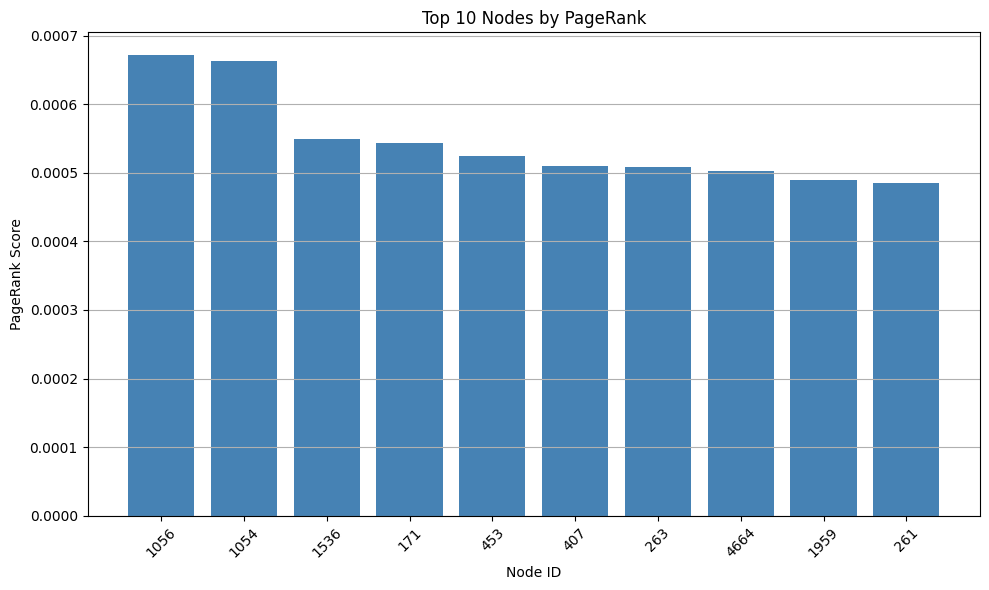

In [ ]:
# top 10 page rank
top10_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_pr = [str(n) for n, _ in top10_pagerank]
scores_pr = [s for _, s in top10_pagerank]

plt.figure(figsize=(10, 6))
plt.bar(nodes_pr, scores_pr, color='steelblue')
plt.title("Top 10 Nodes by PageRank")
plt.xlabel("Node ID")
plt.ylabel("PageRank Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

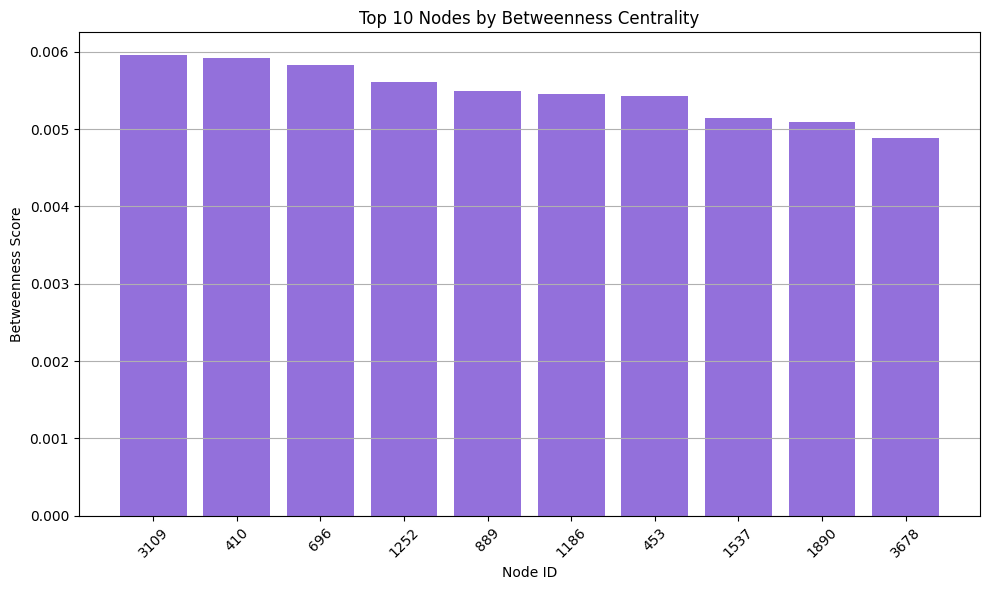

In [ ]:
# top 10 betweenness
top10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_bt = [str(n) for n, _ in top10_betweenness]
scores_bt = [s for _, s in top10_betweenness]

plt.figure(figsize=(10, 6))
plt.bar(nodes_bt, scores_bt, color='mediumpurple')
plt.title("Top 10 Nodes by Betweenness Centrality")
plt.xlabel("Node ID")
plt.ylabel("Betweenness Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


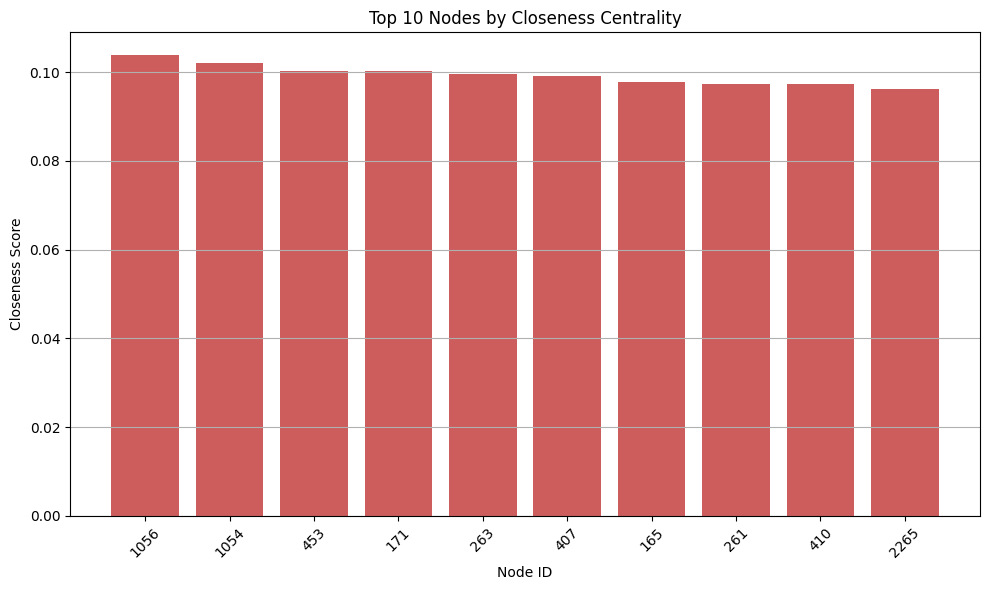

In [ ]:
# top 10 closeness
top10_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]
nodes_cl = [str(n) for n, _ in top10_closeness]
scores_cl = [s for _, s in top10_closeness]

plt.figure(figsize=(10, 6))
plt.bar(nodes_cl, scores_cl, color='indianred')
plt.title("Top 10 Nodes by Closeness Centrality")
plt.xlabel("Node ID")
plt.ylabel("Closeness Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 🔁 Clustering, Transitivity, and Assortativity Analysis

This section focuses on measuring how nodes cluster together and how similar nodes tend to connect in the graph `G`.

### 🔹 1. Average Clustering Coefficient
- **Definition:** The clustering coefficient of a node quantifies how close its neighbors are to being a complete clique (fully connected).
- **Calculation:** 
  - `nx.average_clustering(undirected_G)` computes the mean clustering coefficient over all nodes in the **undirected** version of the graph.
- **Insight:** Higher values indicate a more tightly-knit local neighborhood structure.

### 🔹 2. Transitivity
- **Definition:** A global form of the clustering coefficient. It measures the probability that adjacent nodes of a node are connected.
- **Calculation:** 
  - `nx.transitivity(undirected_G)` calculates the ratio of triangles to triplets in the graph.
- **Insight:** Indicates how interconnected the network is at a global scale.

### 🔹 3. Assortativity Coefficient
- **Definition:** Measures the similarity of connections in the graph with respect to the node degree.
- **Calculation:**
  - `nx.degree_pearson_correlation_coefficient(G)` computes the Pearson correlation coefficient of node degrees at either end of an edge.
- **Insight:**
  - A **positive** value means nodes tend to connect to others with similar degree (assortative mixing).
  - A **negative** value means high-degree nodes connect to low-degree ones (disassortative mixing).

In [9]:
print("\nClustering and Transitivity:")
print("--------------------------------")
undirected_G = G.to_undirected()
avg_clustering = nx.average_clustering(undirected_G)
transitivity = nx.transitivity(undirected_G)
print(f"Average clustering coefficient: {avg_clustering:.5f}")
print(f"Transitivity: {transitivity:.5f}")
print(f"Assortativity coefficient: {nx.degree_pearson_correlation_coefficient(G):.4f}")


Clustering and Transitivity:
--------------------------------
Average clustering coefficient: 0.00622
Transitivity: 0.00540
Assortativity coefficient: -0.0083



Visualization (sample of 1000 nodes):
--------------------------------


C:\Users\Deniz\AppData\Local\Temp\ipykernel_10020\1896332663.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


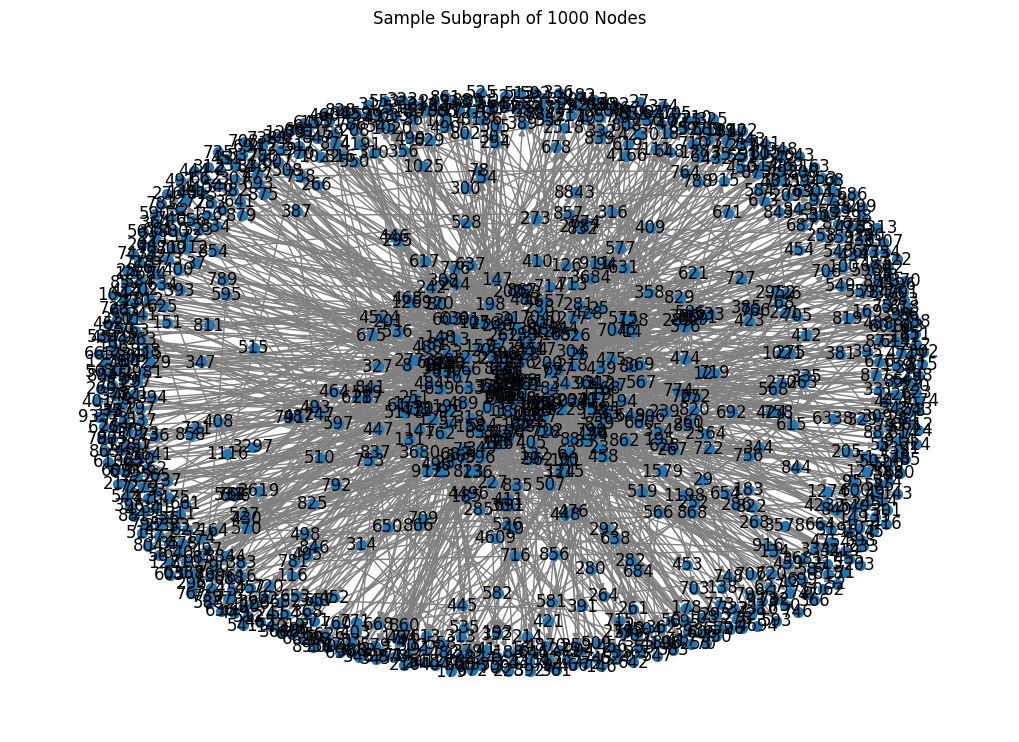

In [10]:

print("\nVisualization (sample of 1000 nodes):")
print("--------------------------------")
sample_nodes = list(G.nodes())[:1000]
subgraph = G.subgraph(sample_nodes)
plt.figure(figsize=(10, 7))
nx.draw(subgraph, with_labels=True, node_size=50, arrows=True, edge_color='gray')
plt.title("Sample Subgraph of 1000 Nodes")
plt.tight_layout()
plt.show()

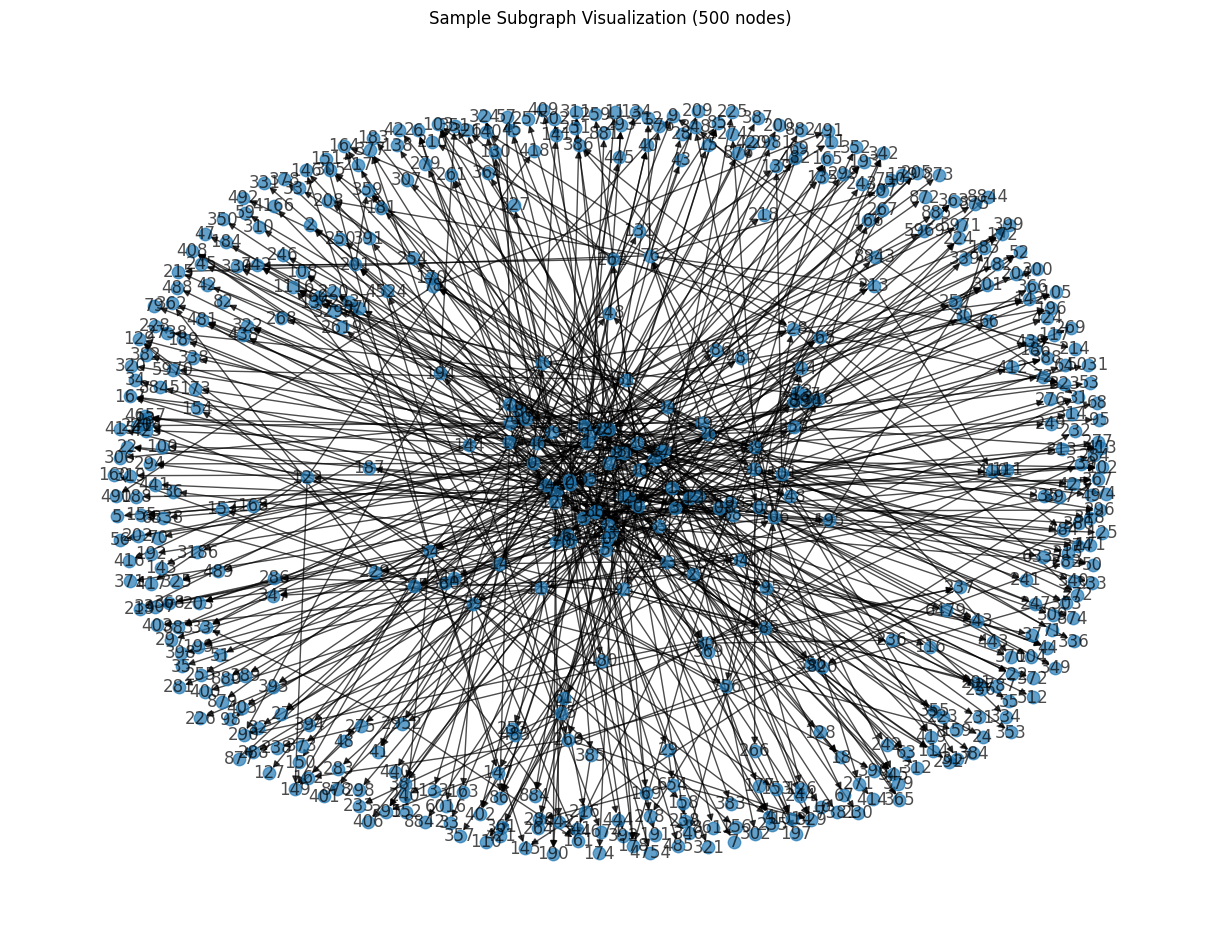

In [11]:
sample_nodes = list(G.nodes())[:500]  
sample_subgraph = G.subgraph(sample_nodes)

plt.figure(figsize=(12, 9))
nx.draw(sample_subgraph, with_labels=True, node_size=80, arrows=True, alpha=0.7)
plt.title("Sample Subgraph Visualization (500 nodes)")
plt.show()

## 📈 Degree Distribution Analysis

The degree distribution provides insight into how connections (edges) are distributed among nodes in the network.

### 🔹 Plot Description
- **X-axis (Degree):** The number of edges connected to each node (node degree).
- **Y-axis (Frequency):** The number of nodes that have a given degree.


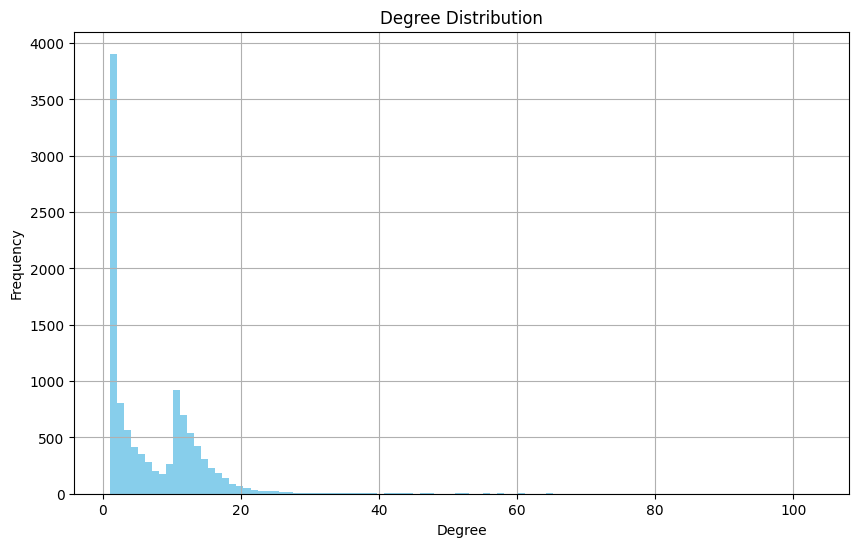

In [12]:
degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, color='skyblue')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## 🔄 In-Degree vs Out-Degree Analysis

This scatter plot compares the **in-degree** and **out-degree** of each node in the directed graph `G`.

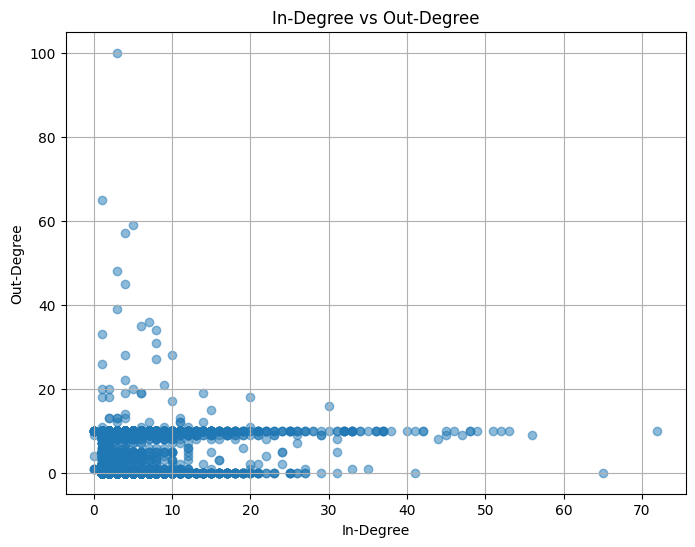

In [13]:
in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

plt.figure(figsize=(8, 6))
plt.scatter(list(in_deg.values()), list(out_deg.values()), alpha=0.5)
plt.xlabel("In-Degree")
plt.ylabel("Out-Degree")
plt.title("In-Degree vs Out-Degree")
plt.grid(True)
plt.show()

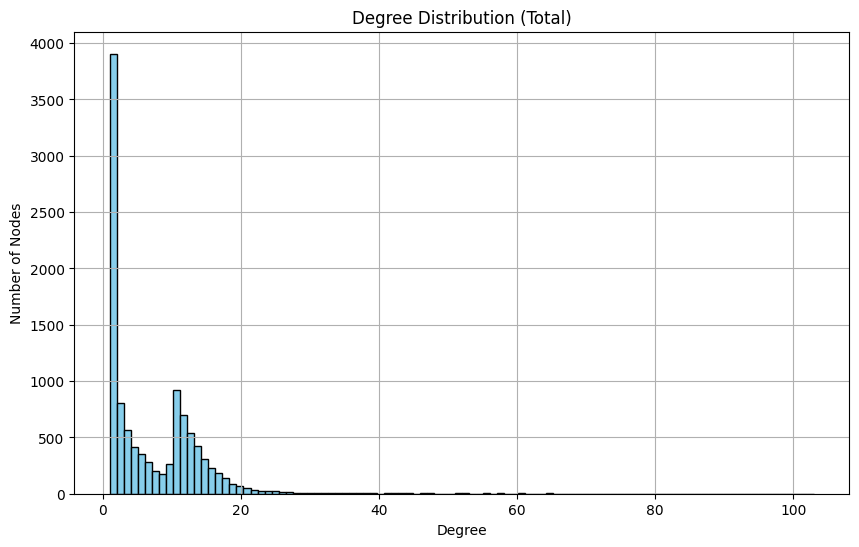

In [ ]:

degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, color='skyblue', edgecolor='black')
plt.title("Degree Distribution (Total)")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.show()

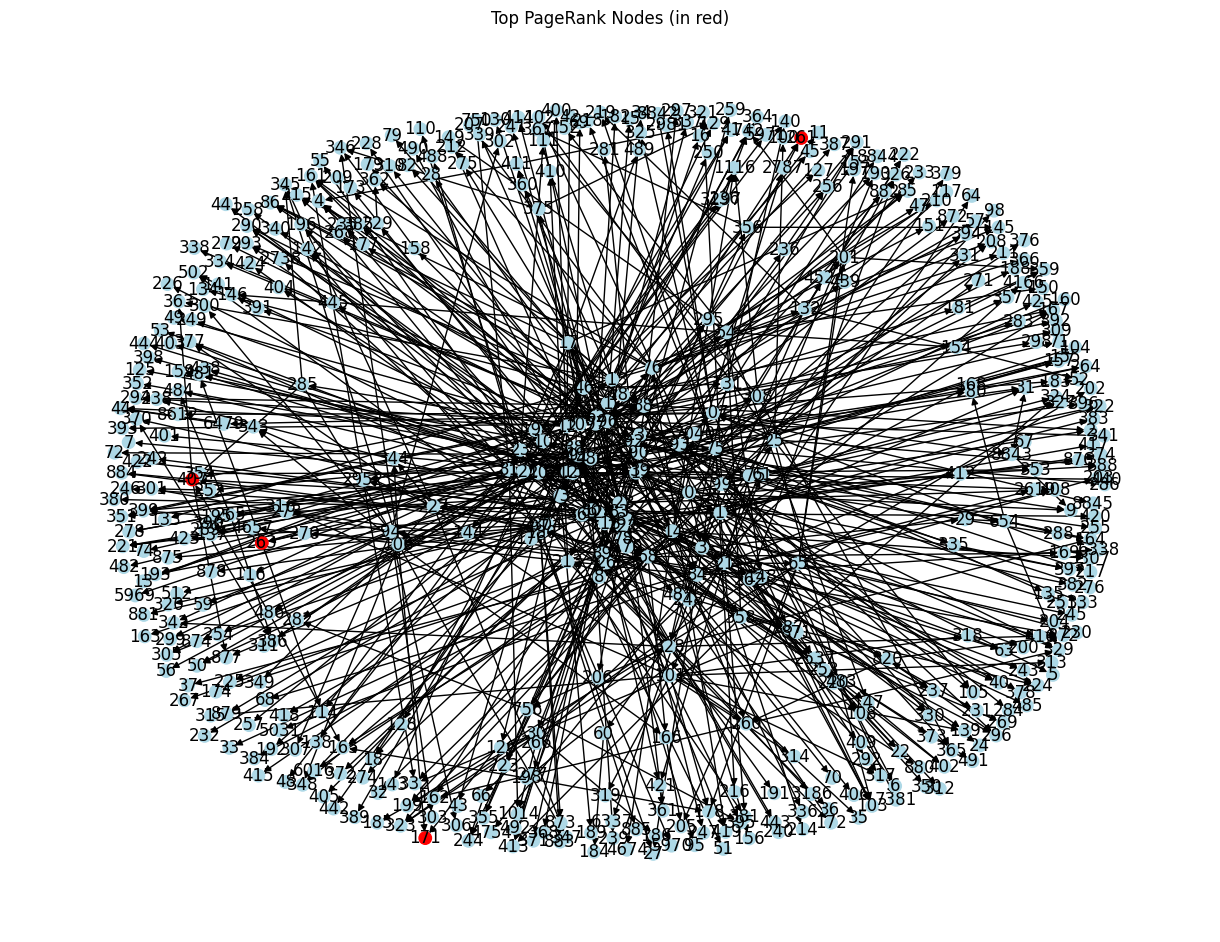

In [15]:
pagerank_scores = nx.pagerank(G)
top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10] #top nodes

top_node_ids = [n for n, _ in top_nodes]
colors = ['red' if n in top_node_ids else 'lightblue' for n in sample_subgraph.nodes()]

plt.figure(figsize=(12, 9))
nx.draw(sample_subgraph, with_labels=True, node_color=colors, node_size=80, arrows=True)
plt.title("Top PageRank Nodes (in red)")
plt.show()

## 🧩 Weakly Connected Component Size Distribution

This plot displays the size distribution of weakly connected components in the directed graph `G`.

### 🔹 What is a Weakly Connected Component?
- A **weakly connected component** in a directed graph is a subgraph where each node is connected to every other node **if direction is ignored**.
- This means you can reach any node from any other **when treating all edges as undirected**.

### 🔹 Code Summary

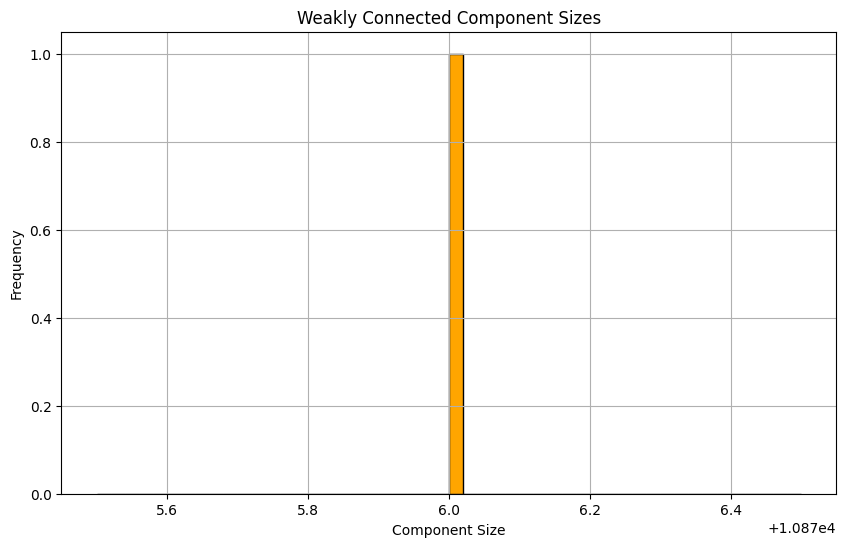

In [16]:
components = nx.weakly_connected_components(G)
component_sizes = [len(c) for c in components]

plt.figure(figsize=(10, 6))
plt.hist(component_sizes, bins=50, color='orange', edgecolor='black')
plt.title("Weakly Connected Component Sizes")
plt.xlabel("Component Size")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## 🧱 Community Detection using Greedy Modularity

This section applies community detection on the undirected version of the graph `G` to uncover groups of densely connected nodes (communities).

### 🔹 What is Community Detection?
- Community detection partitions the graph into subsets (communities) where nodes within the same group are more densely connected to each other than to the rest of the graph.
- This is useful for identifying **functional modules**, **interest groups**, or **attack clusters**, depending on the network domain.

### 🔹 Method Used: Greedy Modularity
- `greedy_modularity_communities()` detects communities by optimizing **modularity**, a measure of the strength of division of a network into modules.
- **Modularity** evaluates the density of links inside communities compared to links between communities.

Number of communities found: 20
Size of the largest community: 2144


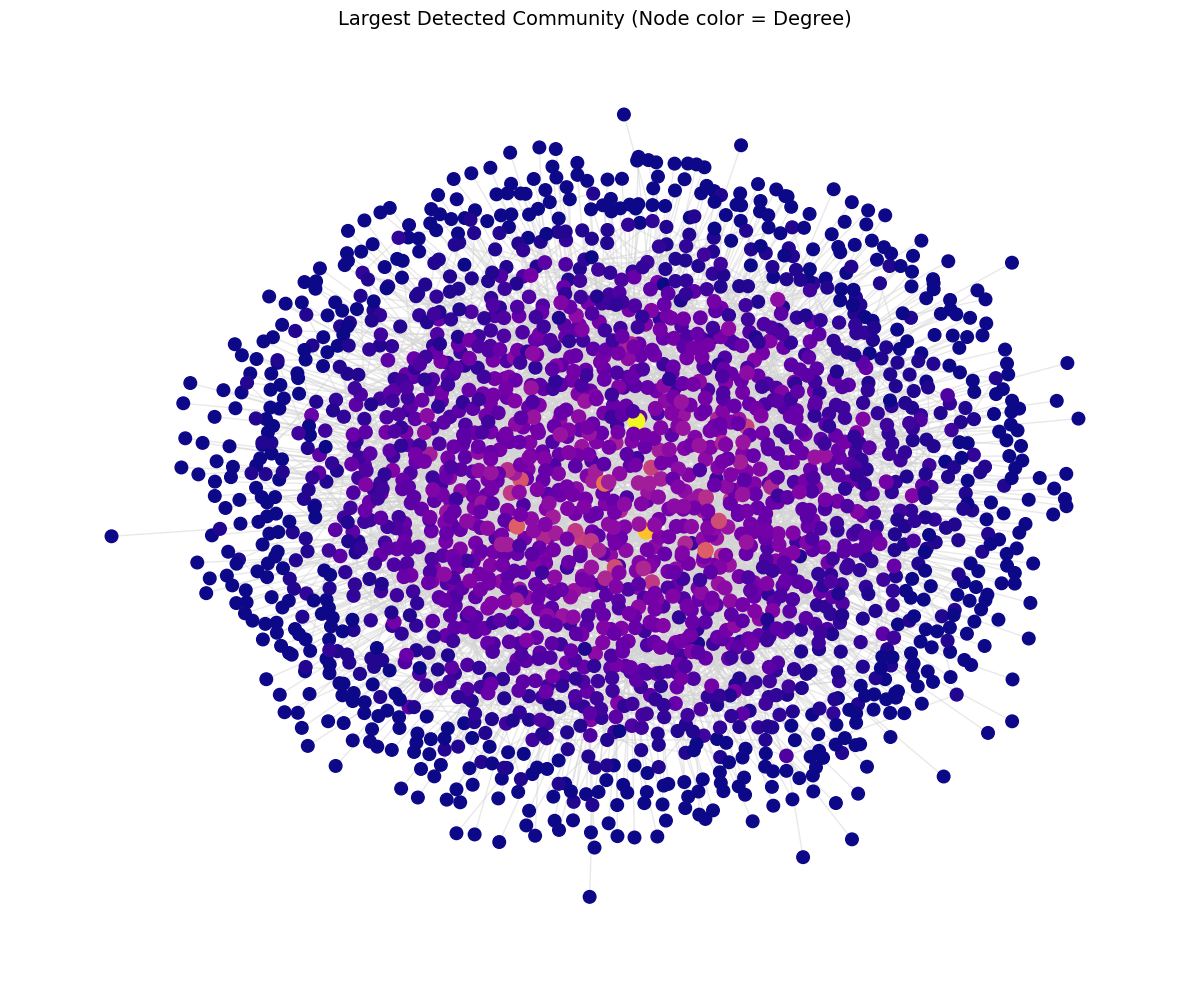

In [ ]:
undirected = G.to_undirected()
communities = list(greedy_modularity_communities(undirected))
print(f"Number of communities found: {len(communities)}")

largest = max(communities, key=len)
print(f"Size of the largest community: {len(largest)}")
subG = undirected.subgraph(largest)


node_degrees = dict(subG.degree())
node_colors = [node_degrees[n] for n in subG.nodes()]
node_sizes = [80 + 2 * node_degrees[n] for n in subG.nodes()] 

pos = nx.kamada_kawai_layout(subG)

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(subG, pos, node_color=node_colors, cmap=plt.cm.plasma, node_size=node_sizes)
nx.draw_networkx_edges(subG, pos, edge_color='lightgray', alpha=0.5)
plt.title("Largest Detected Community (Node color = Degree)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


### Community Size Distribution Interpretation

The histogram shows the distribution of community sizes in the network. Most communities are small, while a few are significantly larger.

This suggests a **modular structure with many small clusters** and a few dominant groups — consistent with the behavior of P2P networks where nodes cluster around content, location, or uptime.

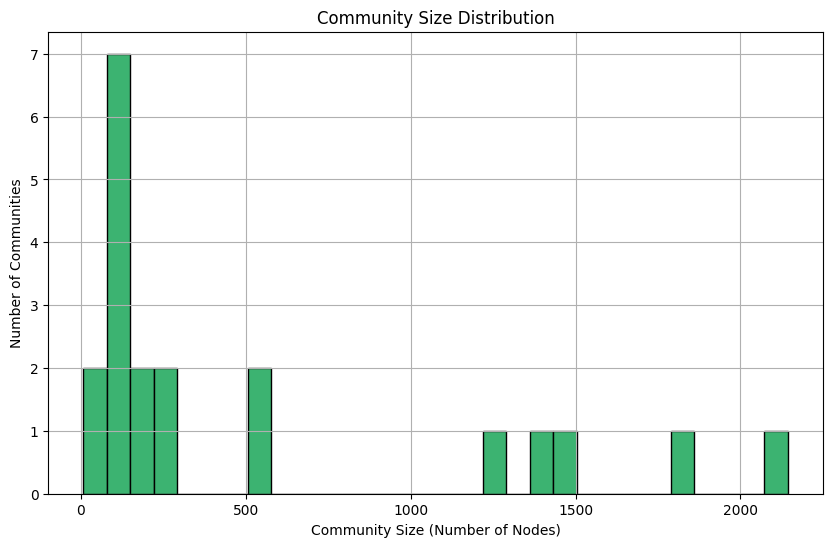

In [ ]:
community_sizes = [len(c) for c in communities]


plt.figure(figsize=(10, 6))
plt.hist(community_sizes, bins=30, color='mediumseagreen', edgecolor='black')
plt.title("Community Size Distribution")
plt.xlabel("Community Size (Number of Nodes)")
plt.ylabel("Number of Communities")
plt.grid(True)
plt.show()

### Undirected Triangle Interpretation

- A **directed triangle** (3-cycle) indicates a fully reciprocal feedback structure among three nodes.
- The number of **3-cycles** in this peer-to-peer network is relatively low — indicating limited mutual awareness or circular routing.
- The **transitivity** metric offers a global measure of triangle density relative to connected triplets — even in a directed context.

Total number of triangles (undirected): 934


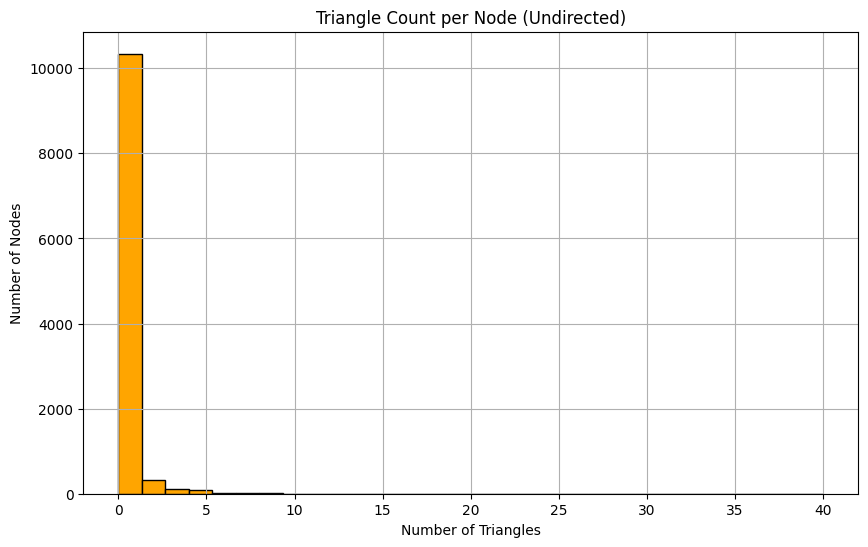

In [19]:

triangle_counts = nx.triangles(undirected)
total_triangles = sum(triangle_counts.values()) // 3
print(f"Total number of triangles (undirected): {total_triangles}")

# 4. Histogram of triangle counts per node
plt.figure(figsize=(10, 6))
plt.hist(triangle_counts.values(), bins=30, color='orange', edgecolor='black')
plt.title("Triangle Count per Node (Undirected)")
plt.xlabel("Number of Triangles")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.show()

### Core-Periphery (k-Core) Interpretation

The maximum k-core value shows the deepest level of cohesion in the network. 
Nodes in higher k-cores are part of the **core** — densely interconnected and resilient.
Nodes in lower k-cores form the **periphery**, typically less connected and more vulnerable to disconnection.
This analysis reveals the **inner backbone** of the network.

In [39]:
undirected = G.to_undirected()
core_numbers = nx.core_number(undirected)
max_core = max(core_numbers.values())

print("Core-Periphery (k-Core) Analysis")
print("----------------------------------")
print(f"Maximum k-core value: {max_core}")

# Count how many nodes belong to each core level
from collections import Counter
core_distribution = Counter(core_numbers.values())

print("\nNumber of nodes in each k-core:")
for k, count in sorted(core_distribution.items()):
    print(f"k = {k}: {count} nodes")


Core-Periphery (k-Core) Analysis
----------------------------------
Maximum k-core value: 7

Number of nodes in each k-core:
k = 1: 2497 nodes
k = 2: 1480 nodes
k = 3: 810 nodes
k = 4: 656 nodes
k = 5: 576 nodes
k = 6: 4492 nodes
k = 7: 365 nodes


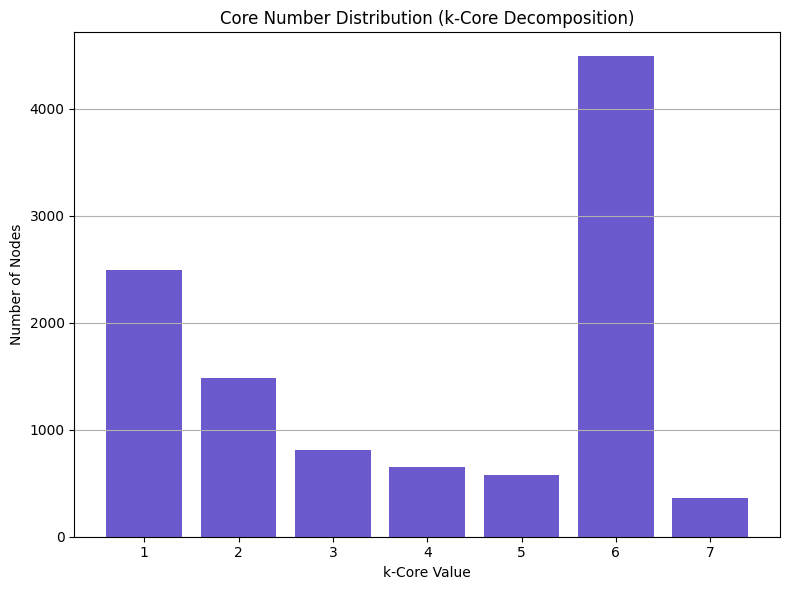

In [40]:
# Plot number of nodes per k-core
ks, counts = zip(*sorted(core_distribution.items()))
plt.figure(figsize=(8, 6))
plt.bar(ks, counts, color='slateblue')
plt.title("Core Number Distribution (k-Core Decomposition)")
plt.xlabel("k-Core Value")
plt.ylabel("Number of Nodes")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Shortest Paths and Diameter (on Largest SCC)

Since the full graph and even the largest WCC are not strongly connected, we used the **largest strongly connected component** (SCC) for shortest-path calculations.

- The **average shortest path length** shows typical communication cost (in hops) within this tightly connected cluster.
- The **diameter** represents the furthest distance between any two nodes in this component.

This gives a realistic picture of connectivity and efficiency inside the most functionally active portion of the network.


In [42]:
# Find the largest strongly connected component
largest_scc_nodes = max(nx.strongly_connected_components(G), key=len)
largest_scc_subgraph = G.subgraph(largest_scc_nodes)

print("Path Length and Diameter Analysis (SCC)")
print("----------------------------------------")
print(f"Largest SCC size: {largest_scc_subgraph.number_of_nodes()} nodes")

# Now this will work
avg_path_length = nx.average_shortest_path_length(largest_scc_subgraph)
diameter = nx.diameter(largest_scc_subgraph.to_undirected())  # Still use undirected for diameter

print(f"Average shortest path length: {avg_path_length:.4f}")
print(f"Diameter (longest shortest path): {diameter}")


Path Length and Diameter Analysis (SCC)
----------------------------------------
Largest SCC size: 4317 nodes
Average shortest path length: 6.6898
Diameter (longest shortest path): 7
